# Homogenizing the columns' scale

## The standard scaler
This converts the features into normal distribution by setting their mean to 0 and their standard deviation to 1. This is done using the following operation, where a column's mean value is subtracted from each value in it, and then the result is divided by the column's standard deviation value:

## $$ Scaler(x_i) = \frac{(x_i - x_{mean})}{x_{std}}$$

The scaler's implementation can be used as follows:  
`from sklearn.preprocessing import StandardScaler`   
`scaler = StandardScaler()`  
`x_train_scaled = scaler.fit_transform(x_train)`   
`x_test_scaled = scaler.transform(x_test)`

## The MinMax scaler
This squeezes the features into a certain range, typically between (0 and 1). If you need to use a different range, you can set it using the feature_range parameter. This scaler works as follows:  

`from sklearn.preprocessing import MinMaxScaler`  
`scaler = MinMaxScaler(feature_range=(0,1))`  
`x_train_scaled = scaler.fit_transform(x_train)`  
`x_test_scaled = scaler.transform(x_test)`  

## RobustScaler
This is similar to the standard scaler, but uses the data quantiles instead to be more robust to the outliers' effect on the mean and standard deviation. It's advised that you use this if your data has outliers, and it can be used as follows:  

`from sklearn.preprocessing import RobustScaler`  
`scaler = RobustScaler()`  
`x_train_scaled = scaler.fit_transform(x_train)`  
`x_test_scaled = scaler.transform(x_test)`  



# Selecting the most useful features

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
from sklearn import datasets

wine = datasets.load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = pd.Series(wine.target)

df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [4]:
df.shape

(178, 14)

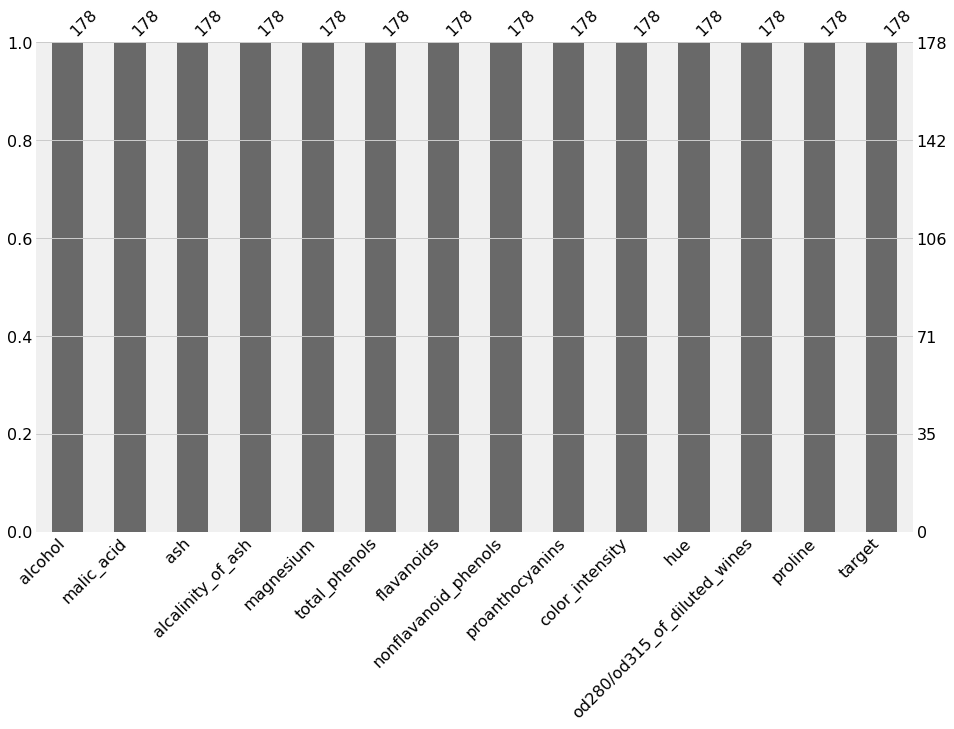

In [5]:
msno.bar(df, figsize=(14, 9))

## Spliting data

In [7]:
data = df.drop(columns=['target'])
target = df.target

In [8]:
target.value_counts(normalize=True)

1    0.398876
0    0.331461
2    0.269663
Name: target, dtype: float64